In [2]:
# Import Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt

#Loading Dataset
#dataset = load_dataset('lukebarousse/data_jobs')
#df = dataset['train'].to_pandas()

df = pd.read_csv("C:\\Users\\whitt\\Downloads\\job_postings_flat.csv")

#Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

# filter job_posted_date for 2025
df = df[df['job_posted_date'].dt.year == 2024]

c:\Users\whitt\anaconda3\envs\python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
## Skill count per month for data analysts
df_DA_US = df[(df['job_title'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

df_DA_US['job_posted_month_no'] = df_DA_US['job_posted_date'].dt.month

# Explode job_skills column
df_DA_US_explode = df_DA_US.explode('job_skills')

In [4]:
# Group by month and job_skills
df_DA_US_pivot = df_DA_US_explode.pivot_table(index='job_posted_month_no', columns='job_skills',  aggfunc='size', fill_value=0)

df_DA_US_pivot

job_skills,airflow,airtable,alteryx,angular,ansible,apl,arch,asana,asp.net,assembly,...,vmware,vue,vue.js,windows,wire,word,workzone,wrike,xamarin,zoom
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,12,0,18,1,4,0,2,0,0,2,...,0,0,1,15,1,99,0,0,0,4
2,23,0,25,1,2,0,0,1,1,2,...,0,1,0,8,2,87,0,0,0,7
3,6,0,21,0,3,0,2,0,1,0,...,0,0,0,5,1,55,0,0,0,2
4,1,0,17,0,0,0,1,0,0,0,...,0,0,0,5,0,59,0,0,0,3
5,3,3,27,0,0,0,2,0,1,1,...,1,0,0,7,1,63,0,0,0,1
6,2,3,15,1,0,0,6,1,0,1,...,0,0,0,8,1,53,1,0,1,6
7,14,0,17,7,0,0,0,0,0,0,...,0,0,0,1,0,68,0,1,0,3
8,26,0,0,22,0,0,0,0,0,0,...,0,0,0,0,0,54,0,0,0,0
9,15,0,1,11,0,0,0,0,0,0,...,0,0,0,0,0,43,0,0,0,0


In [5]:
# sorts by count
df_DA_US_pivot.loc['Total'] = df_DA_US_pivot.sum()
df_DA_US_pivot = df_DA_US_pivot[df_DA_US_pivot.loc['Total'].sort_values(ascending=False).index]
df_DA_US_pivot = df_DA_US_pivot.drop('Total')

df_DA_US_pivot

job_skills,sql,excel,python,tableau,power bi,r,sas,word,aws,powerpoint,...,rust,ubuntu,sass,ovh,selenium,dart,npm,apl,datarobot,redhat
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,572,339,376,288,209,215,182,99,84,75,...,0,0,1,0,1,0,0,0,0,0
2,604,346,410,323,220,226,166,87,92,70,...,1,1,0,0,0,0,1,0,1,1
3,377,235,244,207,154,130,78,55,67,47,...,0,0,0,0,0,0,0,0,0,0
4,346,262,192,180,156,110,132,59,34,56,...,0,0,0,1,0,0,0,0,0,0
5,428,281,240,235,171,137,120,63,39,64,...,0,0,0,0,0,0,0,0,0,0
6,359,237,207,185,157,99,96,53,44,55,...,0,0,0,0,0,0,0,0,0,0
7,506,322,280,240,201,175,190,68,59,62,...,0,0,0,0,0,1,0,0,0,0
8,656,417,374,292,223,262,342,54,98,45,...,0,0,0,0,0,0,0,0,0,0
9,333,229,221,159,116,171,198,43,69,23,...,0,0,0,0,0,0,0,0,0,0


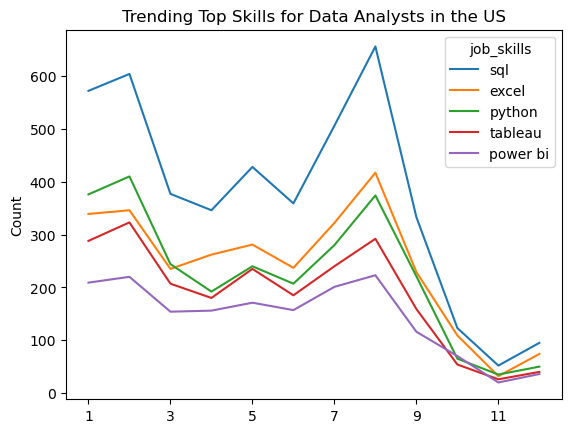

In [6]:
df_DA_US_pivot.iloc[:, :5].plot(kind='line')

plt.title('Trending Top Skills for Data Analysts in the US')
plt.ylabel('Count')
plt.xlabel('')
plt.show()

In [7]:
# Get monthly totals
DA_totals = df_DA_US.groupby('job_posted_month_no').size()

DA_totals

job_posted_month_no
1     1127
2     1089
3      678
4      561
5      655
6      602
7      774
8      948
9      530
10     226
11      94
12     177
dtype: int64

In [8]:
# divide first 12 rows of df_DA_pivot by DA_totals
df_DA_US_percent = df_DA_US_pivot.iloc[:12].div(DA_totals/100, axis=0)

# changes month number to month name
df_DA_US_percent = df_DA_US_percent.reset_index()
df_DA_US_percent['job_posted_month'] = df_DA_US_percent['job_posted_month_no'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%b'))
df_DA_US_percent = df_DA_US_percent.set_index('job_posted_month')
df_DA_US_percent = df_DA_US_percent.drop(columns='job_posted_month_no')

df_DA_US_percent

job_skills,sql,excel,python,tableau,power bi,r,sas,word,aws,powerpoint,...,rust,ubuntu,sass,ovh,selenium,dart,npm,apl,datarobot,redhat
job_posted_month,,,,,,,,,,,,,,,,,,,,,
Jan,50.754215,30.079858,33.362910,25.554570,18.544809,19.077196,16.149068,8.784383,7.453416,6.654836,...,0.000000,0.000000,0.088731,0.000000,0.088731,0.000000,0.000000,0.000000,0.000000,0.000000
Feb,55.463728,31.772268,37.649219,29.660239,20.202020,20.752984,15.243343,7.988981,8.448118,6.427916,...,0.091827,0.091827,0.000000,0.000000,0.000000,0.000000,0.091827,0.000000,0.091827,0.091827
Mar,55.604720,34.660767,35.988201,30.530973,22.713864,19.174041,11.504425,8.112094,9.882006,6.932153,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Apr,61.675579,46.702317,34.224599,32.085561,27.807487,19.607843,23.529412,10.516934,6.060606,9.982175,...,0.000000,0.000000,0.000000,0.178253,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
May,65.343511,42.900763,36.641221,35.877863,26.106870,20.916031,18.320611,9.618321,5.954198,9.770992,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Jun,59.634551,39.368771,34.385382,30.730897,26.079734,16.445183,15.946844,8.803987,7.308970,9.136213,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Jul,65.374677,41.602067,36.175711,31.007752,25.968992,22.609819,24.547804,8.785530,7.622739,8.010336,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.129199,0.000000,0.000000,0.000000,0.000000
Aug,69.198312,43.987342,39.451477,30.801688,23.523207,27.637131,36.075949,5.696203,10.337553,4.746835,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Sep,62.830189,43.207547,41.698113,30.000000,21.886792,32.264151,37.358491,8.113208,13.018868,4.339623,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


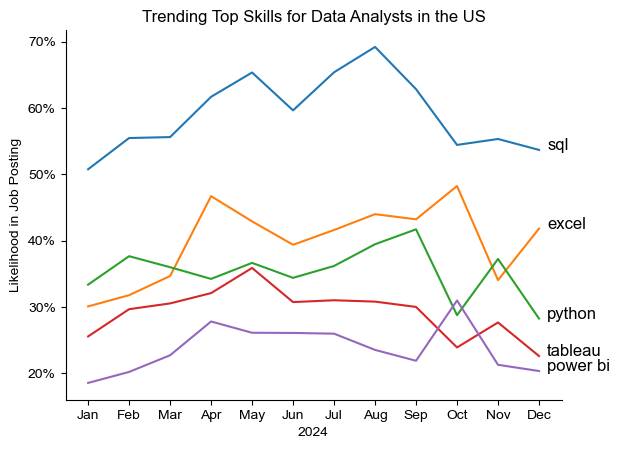

In [9]:
from matplotlib.ticker import PercentFormatter

df_plot = df_DA_US_percent.iloc[:, :5]
sns.lineplot(data=df_plot, dashes=False, legend='full', palette='tab10')
sns.set_theme(style='ticks')
sns.despine() # remove top and right spines

plt.title('Trending Top Skills for Data Analysts in the US')
plt.ylabel('Likelihood in Job Posting')
plt.xlabel('2024')
plt.legend().remove()
plt.gca().yaxis.set_major_formatter(PercentFormatter(decimals=0))

# annotate the plot with the top 5 skills using plt.text()
for i in range(5):
    plt.text(11.2, df_plot.iloc[-1, i], df_plot.columns[i], color='black')

plt.show()